# **PROBLEMA DE NEGOCIO**


---




La necesidad de prever y optimizar el gasto de sus usuarios ha llevado a una empresa de comercio electrónico a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para desarrollar un modelo de machine learning que pueda predecir con precisión cuánto gastará un usuario al visitar dicho sitio web.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Importar correctamente y analizar y comprender el conjunto de datos proporcionado, realizar limpieza de datos, eliminar atributos que no aportan valor y manejar valores faltantes.

**2. Exploración y Feature Engineering:** Realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes, identificar variables llaves, codificación de variables categóricas y normalización/escalado de datos.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Linear Regression, Decision Tree Regressor, Random Forest Regressor, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como el error cuadrático medio (MSE), la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación (R²). Seleccionar el modelo con el mejor rendimiento para la predicción del gasto de los usuarios.

# **1. Configuración del Ambiente**


---




In [643]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Preprocesamiento de Datos**


---


In [644]:
## Importar el df, para analizar como se importa la informaciòn
df = pd.read_csv('database/traffic_site.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})
df.sample(5)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
1954,Paid Search,20161125,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9197292506380217506,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",9197292506380217506_1480064152,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""9"", ""pageviews"": ""9""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1480064152,2,1480064152
1334,Direct,20161030,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",9107014698985322090,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",9107014698985322090_1477873241,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1477873241,2,1477873241
11128,Referral,20170628,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6423669617845731307,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6423669617845731307_1498664830,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1498664830,4,1498664830
8278,Direct,20170124,"{""browser"": ""Safari (in-app)"", ""browserVersion...",7191543200497614125,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",7191543200497614125_1485318391,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1485318391,1,1485318391
6609,Direct,20160928,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",5173899854717474342,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",5173899854717474342_1475068246,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1475068246,12,1475068246


In [645]:
# Identificar el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  object
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  object
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  object
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [646]:
df_traffic = df.copy()

In [647]:
# Convertimos las cadenas de texto a diccionarios json
columnas_a_cambiar = ['device', 'geoNetwork', 'totals', 'trafficSource']
for columna in columnas_a_cambiar:
    df_traffic[columna] = df_traffic[columna].apply(json.loads)

# Expandimos los diccionarios en columnas separadas y las unimos al df_traffic
for columna in columnas_a_cambiar:
    expander_columnas = pd.json_normalize(df_traffic[columna])
    df_traffic = pd.concat([df_traffic.drop([columna], axis=1), expander_columnas], axis=1)

df_traffic.sample(5)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
329,Social,20161112,6266575412373747077,6266575412373747077_1478955508,Not Socially Engaged,1478955508,1,1478955508,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9497,Social,20161113,158142647536141579,0158142647536141579_1479046570,Not Socially Engaged,1479046570,1,1479046570,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8105,Referral,20161012,940858416149683906,940858416149683906_1476308087,Not Socially Engaged,1476308087,5,1476308087,Chrome,not available in demo dataset,...,not available in demo dataset,True,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8621,Direct,20170123,195498858513538488,0195498858513538488_1485196840,Not Socially Engaged,1485196840,2,1485196840,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10541,Organic Search,20161120,1445475429440775713,1445475429440775713_1479678924,Not Socially Engaged,1479678924,1,1479678924,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [648]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channelGrouping                      12283 non-null  object
 1   date                                 12283 non-null  object
 2   fullVisitorId                        12283 non-null  object
 3   sessionId                            12283 non-null  object
 4   socialEngagementType                 12283 non-null  object
 5   visitId                              12283 non-null  object
 6   visitNumber                          12283 non-null  int64 
 7   visitStartTime                       12283 non-null  int64 
 8   browser                              12283 non-null  object
 9   browserVersion                       12283 non-null  object
 10  browserSize                          12283 non-null  object
 11  operatingSystem                      1228

<Axes: >

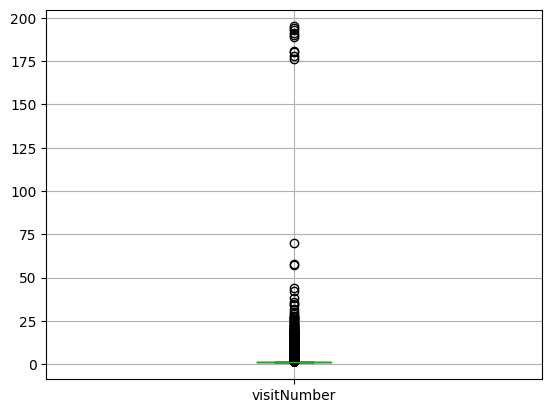

In [649]:
# Identificar Valores unicos
numericals = df_traffic.select_dtypes(include=['int']).columns

df_traffic.boxplot(column=numericals[0])

In [650]:
def show_columns_details(dataframe, columns):
# Iterar sobre cada columna y obtener los valores únicos con su conteo, incluyendo los valores nulos para analizar las variables.
    for columna in columns:
        valores_conteo = dataframe[columna].value_counts(dropna=False, normalize=True)*100
        print(f"...............Valores únicos para la columna '{columna}'..............:\n{valores_conteo}")

In [651]:
show_columns_details(df_traffic, df_traffic.columns)

...............Valores únicos para la columna 'channelGrouping'..............:
channelGrouping
Organic Search    41.968574
Social            24.847350
Direct            16.372222
Referral          11.707238
Paid Search        2.523813
Affiliates         1.921355
Display            0.626883
(Other)            0.032565
Name: proportion, dtype: float64
...............Valores únicos para la columna 'date'..............:
date
20161004    0.569893
20161117    0.561752
20161129    0.545469
20161116    0.545469
20161130    0.529187
              ...   
20170507    0.097696
20161224    0.097696
20161225    0.089555
20170430    0.081413
20170618    0.081413
Name: proportion, Length: 366, dtype: float64
...............Valores únicos para la columna 'fullVisitorId'..............:
fullVisitorId
603373162136570069     0.195392
7660377708313228942    0.195392
5310912563447452038    0.162827
3290805371994597664    0.162827
4376572204985925602    0.154685
                         ...   
791790753290103

We will detect all columns with "Not available in demo dataset" value for drop it

In [652]:
def verify_a_value(dataframe, value, criteria=''):
  useless_columns = []
  for column in dataframe.columns:
    values = dataframe[column].value_counts().index
    if criteria == 'unique':
      condition = (value in values) and (len(values) == 1)
    else:
      condition = (value in values)
    if (condition):
      useless_columns.append(column)

  show_columns_details(dataframe, useless_columns)
  return useless_columns


In [653]:
not_available_columns = verify_a_value(df_traffic, 'not available in demo dataset', 'unique')
print(len(not_available_columns))


...............Valores únicos para la columna 'browserVersion'..............:
browserVersion
not available in demo dataset    100.0
Name: proportion, dtype: float64
...............Valores únicos para la columna 'browserSize'..............:
browserSize
not available in demo dataset    100.0
Name: proportion, dtype: float64
...............Valores únicos para la columna 'operatingSystemVersion'..............:
operatingSystemVersion
not available in demo dataset    100.0
Name: proportion, dtype: float64
...............Valores únicos para la columna 'mobileDeviceBranding'..............:
mobileDeviceBranding
not available in demo dataset    100.0
Name: proportion, dtype: float64
...............Valores únicos para la columna 'mobileDeviceModel'..............:
mobileDeviceModel
not available in demo dataset    100.0
Name: proportion, dtype: float64
...............Valores únicos para la columna 'mobileInputSelector'..............:
mobileInputSelector
not available in demo dataset    100.0
Name:

In [654]:
df_traffic = df_traffic.drop(columns=not_available_columns)

In [655]:
not_available_columns = verify_a_value(df_traffic, 'not available in demo dataset')
len(not_available_columns)

...............Valores únicos para la columna 'region'..............:
region
not available in demo dataset    55.727428
California                       11.959619
New York                          3.215827
(not set)                         2.922739
England                           1.489864
                                   ...    
Perak                             0.008141
Maha Sarakham                     0.008141
Grand Casablanca                  0.008141
Western Cape                      0.008141
Ho Chi Minh City                  0.008141
Name: proportion, Length: 212, dtype: float64
...............Valores únicos para la columna 'metro'..............:
metro
not available in demo dataset             55.727428
(not set)                                 21.973459
San Francisco-Oakland-San Jose CA         10.657006
New York NY                                3.248392
London                                     1.416592
Los Angeles CA                             1.107221
Chicago IL       

3

In [656]:
show_columns_details(df_traffic, df_traffic.columns)

...............Valores únicos para la columna 'channelGrouping'..............:
channelGrouping
Organic Search    41.968574
Social            24.847350
Direct            16.372222
Referral          11.707238
Paid Search        2.523813
Affiliates         1.921355
Display            0.626883
(Other)            0.032565
Name: proportion, dtype: float64
...............Valores únicos para la columna 'date'..............:
date
20161004    0.569893
20161117    0.561752
20161129    0.545469
20161116    0.545469
20161130    0.529187
              ...   
20170507    0.097696
20161224    0.097696
20161225    0.089555
20170430    0.081413
20170618    0.081413
Name: proportion, Length: 366, dtype: float64
...............Valores únicos para la columna 'fullVisitorId'..............:
fullVisitorId
603373162136570069     0.195392
7660377708313228942    0.195392
5310912563447452038    0.162827
3290805371994597664    0.162827
4376572204985925602    0.154685
                         ...   
791790753290103

In [657]:
not_useful_columns = [
  #'socialEngagementType', 
  # 'visits'
  'region', 
  'metro', 
  'city', 
  #'bounces', 
  'keyword', 
  'referralPath', 
  'adwordsClickInfo.page',
  'adwordsClickInfo.slot',
  'adwordsClickInfo.gclId',
  'adwordsClickInfo.adNetworkType',
  'adwordsClickInfo.isVideoAd',
  #'adContent',
  'campaignCode', 'sessionId','visitId', 'networkDomain', 'continent', 'subContinent',
  'channelGrouping', 'fullVisitorId', 'socialEngagementType']

# 'visits': Este valor es 1 para las sesiones con eventos de interacción. Si la sesión no tiene eventos de interacción, el valor es nulo.
# 'socialEngagementType': "participación desde redes sociales" o "sin participación desde redes sociales".
#'bounces': En el caso de una sesión rebotada, el valor es 1; de lo contrario, es nulo.
#'adContent': Contenido del anuncio de la fuente de tráfico. 

df_traffic = df_traffic.drop(columns=not_useful_columns)
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                12283 non-null  object
 1   visitNumber         12283 non-null  int64 
 2   visitStartTime      12283 non-null  int64 
 3   browser             12283 non-null  object
 4   operatingSystem     12283 non-null  object
 5   isMobile            12283 non-null  bool  
 6   deviceCategory      12283 non-null  object
 7   country             12283 non-null  object
 8   visits              12283 non-null  object
 9   hits                12283 non-null  object
 10  pageviews           12283 non-null  object
 11  bounces             6172 non-null   object
 12  newVisits           9445 non-null   object
 13  transactionRevenue  164 non-null    object
 14  campaign            12283 non-null  object
 15  source              12283 non-null  object
 16  medium              12

In [658]:
df_traffic.describe()

,visitNumber,visitStartTime
count,12283.000000,1.228300e+04
mean,1.923390,1.485087e+09
std,5.878228,8.939019e+06
min,1.000000,1.470036e+09
25%,1.000000,1.477635e+09
50%,1.000000,1.484259e+09
75%,1.000000,1.492689e+09
max,195.000000,1.501648e+09


Analizamos el contenido de la columna visitNumber

In [659]:
df_traffic['visitNumber'].value_counts(normalize=True, dropna=False)

visitNumber
1      0.768949
2      0.103965
3      0.043312
4      0.023284
5      0.014003
6      0.008711
7      0.006350
8      0.005129
9      0.004803
10     0.003826
11     0.003257
12     0.002442
13     0.001547
14     0.001303
16     0.001303
17     0.001140
18     0.000977
15     0.000977
20     0.000651
19     0.000488
22     0.000407
21     0.000326
24     0.000244
27     0.000244
26     0.000244
25     0.000163
195    0.000081
57     0.000081
70     0.000081
178    0.000081
58     0.000081
181    0.000081
23     0.000081
29     0.000081
42     0.000081
30     0.000081
180    0.000081
36     0.000081
176    0.000081
38     0.000081
28     0.000081
35     0.000081
34     0.000081
189    0.000081
32     0.000081
191    0.000081
190    0.000081
194    0.000081
193    0.000081
44     0.000081
Name: proportion, dtype: float64

In [660]:
df_traffic.head()

,date,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,country,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,adContent
0,20160902,1,1472804607,Chrome,Windows,False,desktop,Singapore,1,1,1,1,1,NaN,(not set),google,organic,NaN,NaN
1,20160902,1,1472835928,Chrome,Macintosh,False,desktop,Poland,1,1,1,1,1,NaN,(not set),google,organic,NaN,NaN
2,20160902,1,1472856802,Chrome,Macintosh,False,desktop,Argentina,1,1,1,1,1,NaN,Data Share Promo,Partners,affiliate,NaN,NaN
3,20160902,2,1472879649,Safari,iOS,True,mobile,United States,1,1,1,1,NaN,NaN,(not set),google,organic,True,NaN
4,20160902,1,1472829671,Safari,iOS,True,mobile,United States,1,5,4,NaN,1,NaN,(not set),google,organic,NaN,NaN


In [661]:
df_traffic.info()
#Imputar newVisits por 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                12283 non-null  object
 1   visitNumber         12283 non-null  int64 
 2   visitStartTime      12283 non-null  int64 
 3   browser             12283 non-null  object
 4   operatingSystem     12283 non-null  object
 5   isMobile            12283 non-null  bool  
 6   deviceCategory      12283 non-null  object
 7   country             12283 non-null  object
 8   visits              12283 non-null  object
 9   hits                12283 non-null  object
 10  pageviews           12283 non-null  object
 11  bounces             6172 non-null   object
 12  newVisits           9445 non-null   object
 13  transactionRevenue  164 non-null    object
 14  campaign            12283 non-null  object
 15  source              12283 non-null  object
 16  medium              12

## Analizamos y tratamos los valores nulos

In [662]:
df_traffic.isnull().sum()

date                      0
visitNumber               0
visitStartTime            0
browser                   0
operatingSystem           0
isMobile                  0
deviceCategory            0
country                   0
visits                    0
hits                      0
pageviews                 0
bounces                6111
newVisits              2838
transactionRevenue    12119
campaign                  0
source                    0
medium                    0
isTrueDirect           8398
adContent             12137
dtype: int64

In [663]:
df_traffic[['bounces', 'newVisits', 'isTrueDirect', 'adContent', 'transactionRevenue']].head()

,bounces,newVisits,isTrueDirect,adContent,transactionRevenue
0,1,1,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN
2,1,1,NaN,NaN,NaN
3,1,NaN,True,NaN,NaN
4,NaN,1,NaN,NaN,NaN


Analizamos el diccionario de los datos:

- bounces: En el caso de una sesión rebotada, el valor es 1; de lo contrario, es nulo.

Conclusión: reemplazamos en bounces NaN por 0.

- newVisits: Identifica si un usuario es nuevo o no. 

Conclusión: Imputamos NaN por 0.

- isTrueDirect: variable booleana.

Conclusión: Imputamos NaN por False.

- adContent: Contenido del anuncio de la fuente de tráfico.

Conclusión: analizaremos qué valores tiene esta variable para determinar qué estrategia de imputación seguir.

- transactionRevenue: el monto de compra del visitante. 

Conclusión: Imputamos NaN por 0. 




In [664]:
df_traffic['adContent'].value_counts(normalize=True, dropna=False)*100

adContent
NaN                                   98.811365
Google Merchandise Collection          0.602459
Google Online Store                    0.113979
Display Ad created 3/11/14             0.097696
Ad from 11/3/16                        0.081413
Ad from 12/13/16                       0.048848
20% discount                           0.048848
{KeyWord:Google Merchandise}           0.048848
Display Ad created 3/11/15             0.032565
{KeyWord:Google Branded Gear}          0.032565
{KeyWord:Looking for Google Bags?}     0.024424
Display Ad created 11/17/14            0.016283
Full auto ad IMAGE ONLY                0.016283
Swag with Google Logos                 0.008141
Ad from 11/7/16                        0.008141
{KeyWord:Google Branded Apparel}       0.008141
Name: proportion, dtype: float64

El 98% de los valores son NaN. Podría indicar que el usuario llegó a la web de manera directa y no a través de una publicidad.
<br> Quizás analizando la columna isTrueDirect podemos confirmar esta hipótesis.

In [665]:
df_traffic['isTrueDirect'].value_counts(normalize=True, dropna=False)*100

isTrueDirect
NaN     68.370919
True    31.629081
Name: proportion, dtype: float64

Según la columna isTrueDirect solamente el 31% de los usuarios accedieron de manera directa. Por lo tanto la columna adContent no estaría aportando información confiable y procedemos a eliminarla.

In [666]:
df_traffic = df_traffic.drop(columns=['adContent'])

### Tratamiendo de nulos para la columna 'bounces'

- bounces: En el caso de una sesión rebotada, el valor es 1; de lo contrario, es nulo.

Conclusión: reemplazamos en bounces NaN por 0.

In [667]:
df_traffic['bounces'].value_counts(normalize=True, dropna=False)*100

bounces
1      50.248311
NaN    49.751689
Name: proportion, dtype: float64

In [668]:
df_traffic['bounces'] = df_traffic['bounces'].fillna(0)
df_traffic['bounces'].value_counts(normalize=True, dropna=False)*100

bounces
1    50.248311
0    49.751689
Name: proportion, dtype: float64

### Tratamiendo de nulos para la columna 'newVisits'

- newVisits: Identifica si un usuario es nuevo o no. 

Conclusión: Imputamos NaN por 0.

In [669]:
def verificamos_valores(column):
  print('Estado inicial:\n',df_traffic[column].value_counts(normalize=True, dropna=False)*100)

def tratamiento_nulos(column, value):
  df_traffic[column] = df_traffic[column].fillna(value)
  print('Estado final:\n', df_traffic[column].value_counts(normalize=True, dropna=False)*100)

In [670]:
verificamos_valores('newVisits')

Estado inicial:
 newVisits
1      76.894895
NaN    23.105105
Name: proportion, dtype: float64


In [671]:
tratamiento_nulos('newVisits', 0)

Estado final:
 newVisits
1    76.894895
0    23.105105
Name: proportion, dtype: float64


### Tratamiento de nulos para 'isTrueDirect'

- isTrueDirect: variable booleana.

Conclusión: Imputamos NaN por False.

In [672]:
verificamos_valores('isTrueDirect')

Estado inicial:
 isTrueDirect
NaN     68.370919
True    31.629081
Name: proportion, dtype: float64


In [673]:
tratamiento_nulos('isTrueDirect', False)

Estado final:
 isTrueDirect
False    68.370919
True     31.629081
Name: proportion, dtype: float64


### Tratamiento de nulos de 'transactionRevenue'

- transactionRevenue: el monto de compra del visitante. 

Conclusión: Imputamos NaN por 0. 

In [674]:
verificamos_valores('transactionRevenue')

Estado inicial:
 transactionRevenue
NaN         98.664821
13590000     0.024424
33590000     0.024424
19190000     0.024424
27190000     0.016283
              ...    
24730000     0.008141
6990000      0.008141
14480000     0.008141
95180000     0.008141
25240000     0.008141
Name: proportion, Length: 147, dtype: float64


In [675]:
tratamiento_nulos('transactionRevenue', 0)

Estado final:
 transactionRevenue
0           98.664821
13590000     0.024424
33590000     0.024424
19190000     0.024424
27190000     0.016283
              ...    
24730000     0.008141
6990000      0.008141
14480000     0.008141
95180000     0.008141
25240000     0.008141
Name: proportion, Length: 147, dtype: float64


Verificamos el resultado final del tratamiento de nulos

In [676]:
df_traffic.isnull().sum()

date                  0
visitNumber           0
visitStartTime        0
browser               0
operatingSystem       0
isMobile              0
deviceCategory        0
country               0
visits                0
hits                  0
pageviews             0
bounces               0
newVisits             0
transactionRevenue    0
campaign              0
source                0
medium                0
isTrueDirect          0
dtype: int64

## Tratamiento de estructuras de datos

In [677]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                12283 non-null  object
 1   visitNumber         12283 non-null  int64 
 2   visitStartTime      12283 non-null  int64 
 3   browser             12283 non-null  object
 4   operatingSystem     12283 non-null  object
 5   isMobile            12283 non-null  bool  
 6   deviceCategory      12283 non-null  object
 7   country             12283 non-null  object
 8   visits              12283 non-null  object
 9   hits                12283 non-null  object
 10  pageviews           12283 non-null  object
 11  bounces             12283 non-null  object
 12  newVisits           12283 non-null  object
 13  transactionRevenue  12283 non-null  object
 14  campaign            12283 non-null  object
 15  source              12283 non-null  object
 16  medium              12

In [678]:
df_traffic.head()


,date,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,country,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect
0,20160902,1,1472804607,Chrome,Windows,False,desktop,Singapore,1,1,1,1,1,0,(not set),google,organic,False
1,20160902,1,1472835928,Chrome,Macintosh,False,desktop,Poland,1,1,1,1,1,0,(not set),google,organic,False
2,20160902,1,1472856802,Chrome,Macintosh,False,desktop,Argentina,1,1,1,1,1,0,Data Share Promo,Partners,affiliate,False
3,20160902,2,1472879649,Safari,iOS,True,mobile,United States,1,1,1,1,0,0,(not set),google,organic,True
4,20160902,1,1472829671,Safari,iOS,True,mobile,United States,1,5,4,0,1,0,(not set),google,organic,False


date -> DateTime <br>
#revisar country <br>
visits -> revisar cuál es el tipo de dato más apropiado <br>
hits -> revisar cuál es el tipo de dato más apropiado <br>
pageview -> int <br>
bounces -> revisar cuál es el tipo de dato más apropiado <br>
newVisits -> int32 <br>
transactionRevenue -> float

### Revisamos 'country'

In [679]:
verificamos_valores('country')

Estado inicial:
 country
United States     40.950908
India              5.739640
United Kingdom     4.078808
Vietnam            2.751771
Canada             2.751771
                    ...    
Greenland          0.008141
Suriname           0.008141
French Guiana      0.008141
Senegal            0.008141
Oman               0.008141
Name: proportion, Length: 145, dtype: float64


Concluimos que el tipo de dato óptimo para country es el de object (que es el que actualmente posee)

### Revisamos 'visits'

In [680]:
verificamos_valores('visits')

Estado inicial:
 visits
1    100.0
Name: proportion, dtype: float64


Conclusión: el mejor tipo de dato para ésta columna sería int32 o Bool, pero como ya está en valores numéricos la convertimos en int.

visits -> int

### Revisamos 'hits'

In [681]:
verificamos_valores('hits')

Estado inicial:
 hits
1      49.857527
2      14.874216
3       7.921518
4       4.551005
5       3.403077
         ...    
471     0.008141
67      0.008141
85      0.008141
130     0.008141
92      0.008141
Name: proportion, Length: 96, dtype: float64


Conclusión: según el diccionario hits representa el número total de hits de un usuario en la interacción de la web por lo tanto el tipo de dato más adecuado sería INT

hits -> int

### Revisamos 'bounces'

In [682]:
verificamos_valores('bounces')

Estado inicial:
 bounces
1    50.248311
0    49.751689
Name: proportion, dtype: float64


Conclusión: El mejor tipo de dato es INT o BOOL pero como ya almacenan valores numéricos lo convertimos en INT.

bounces -> int

### Conclusiones finales 

Debemos tratar las siguientes columnas y sus estructuras de datos

date -> DateTime <br>
visits -> int <br>
hits -> int <br>
pageview -> int <br>
bounces -> int32 <br>
newVisits -> int32 <br>
transactionRevenue -> float

## Transformación de tipos de datos

In [683]:
df_traffic['date'] = pd.to_datetime(df_traffic['date'], format='%Y%m%d')
df_traffic['visitStartTime'] = pd.to_datetime(df_traffic['visitStartTime'], unit='s')
df_traffic = df_traffic.astype({
  'visits': 'uint8', #[0, 255]
  'hits': 'uint16', #[0, 65535]
  'pageviews': 'uint8',
  'bounces': 'uint8',
  'newVisits': 'uint8',
  'transactionRevenue': 'float'
})
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                12283 non-null  datetime64[ns]
 1   visitNumber         12283 non-null  int64         
 2   visitStartTime      12283 non-null  datetime64[ns]
 3   browser             12283 non-null  object        
 4   operatingSystem     12283 non-null  object        
 5   isMobile            12283 non-null  bool          
 6   deviceCategory      12283 non-null  object        
 7   country             12283 non-null  object        
 8   visits              12283 non-null  uint8         
 9   hits                12283 non-null  uint16        
 10  pageviews           12283 non-null  uint8         
 11  bounces             12283 non-null  uint8         
 12  newVisits           12283 non-null  uint8         
 13  transactionRevenue  12283 non-null  float64   

In [684]:
df_traffic.head()

,date,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,country,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect
0,2016-09-02,1,2016-09-02 08:23:27,Chrome,Windows,False,desktop,Singapore,1,1,1,1,1,0.0,(not set),google,organic,False
1,2016-09-02,1,2016-09-02 17:05:28,Chrome,Macintosh,False,desktop,Poland,1,1,1,1,1,0.0,(not set),google,organic,False
2,2016-09-02,1,2016-09-02 22:53:22,Chrome,Macintosh,False,desktop,Argentina,1,1,1,1,1,0.0,Data Share Promo,Partners,affiliate,False
3,2016-09-02,2,2016-09-03 05:14:09,Safari,iOS,True,mobile,United States,1,1,1,1,0,0.0,(not set),google,organic,True
4,2016-09-02,1,2016-09-02 15:21:11,Safari,iOS,True,mobile,United States,1,5,4,0,1,0.0,(not set),google,organic,False


### Análisis de la variable a predecir

#### Analisis de 'transactionRevenue'

<Axes: >

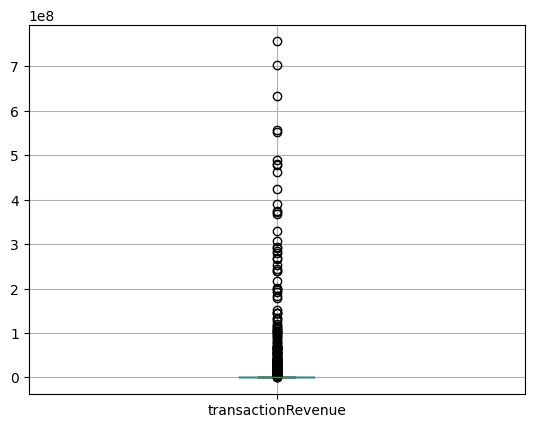

In [685]:
#boxplot
df_traffic.boxplot(column='transactionRevenue')

In [686]:
range(df_traffic.index.start, df_traffic.index.stop)

range(0, 12283)

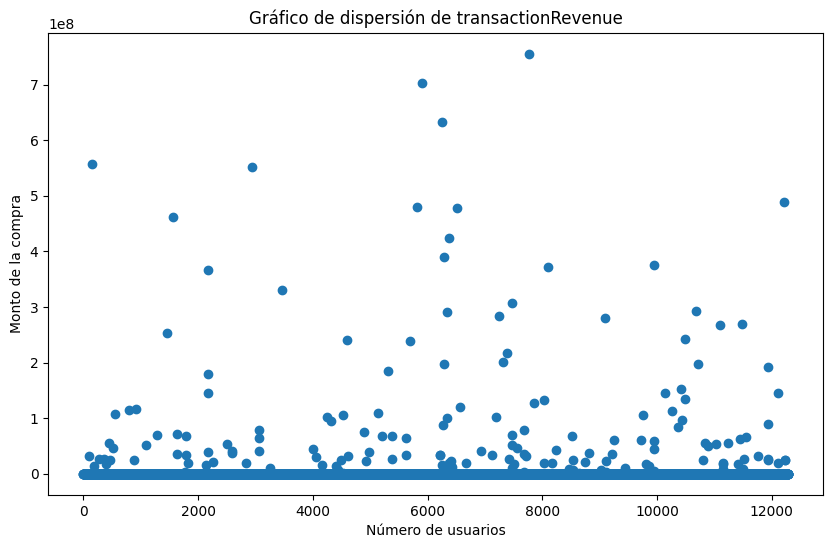

In [687]:
plt.figure(figsize=(10, 6))
plt.title('Gráfico de dispersión de transactionRevenue')
plt.xlabel('Número de usuarios')
plt.ylabel('Monto de la compra')
plt.scatter(range(df_traffic.index.start, df_traffic.index.stop), df_traffic['transactionRevenue'])
plt.show()

In [688]:
# df_traffic['buy'] = np.where(df_traffic['transactionRevenue'] == 0, 0, 1)
# df_traffic['buy'].value_counts(normalize=True)*100

In [689]:
# sns.countplot(data=df_traffic, x='buy')

Recortamos un 50% la clase mayoritaria

Después hacemos un recorte de la clase mayoritaria
Continuamos con un balanceamiento de la clase minoritaria
Verifiamos la distribución de la variable
Si es necesario aplicamos una transformación de la distribución gaussiana
Continuamos con feature engineering

### Transformación de la distribución a una distribución gaussiana

## Feature Engineering

In [690]:
def feature_engineering(data):
  dataframe = data.copy()
  dataframe['year'] = dataframe['date'].dt.year
  dataframe['month'] = dataframe['date'].dt.month
  dataframe['day'] = dataframe['date'].dt.day
  dataframe['quarterMonth'] = dataframe['date'].dt.quarter
  dataframe['weekday'] = dataframe['date'].dt.weekday
  dataframe['time_range'] = pd.cut(dataframe['visitStartTime'].dt.hour, bins=[0,6,12,18,24], labels=['madrugada', 'dia', 'tarde', 'noche']).astype('object')
  dataframe.drop(columns=['date', 'visitStartTime'], inplace=True)
  from sklearn.preprocessing import LabelEncoder
  cualitativas = dataframe.dtypes[dataframe.dtypes == object].keys()
  for columna in cualitativas:
      lbl = LabelEncoder()
      strings = list(dataframe[columna].values.astype('str'))
      lbl.fit(strings)
      dataframe[columna] = lbl.transform(strings)
  return dataframe


In [691]:
df_traffic = feature_engineering(df_traffic)
df_traffic.head()

,visitNumber,browser,operatingSystem,isMobile,deviceCategory,country,visits,hits,pageviews,bounces,...,campaign,source,medium,isTrueDirect,year,month,day,quarterMonth,weekday,time_range
0,1,5,9,False,0,114,1,1,1,1,...,0,23,5,False,2016,9,2,3,4,0
1,1,5,6,False,0,102,1,1,1,1,...,0,23,5,False,2016,9,2,3,4,4
2,1,5,6,False,0,3,1,1,1,1,...,4,3,2,False,2016,9,2,3,4,3
3,2,18,11,True,1,138,1,1,1,1,...,0,23,5,True,2016,9,2,3,4,1
4,1,18,11,True,1,138,1,5,4,0,...,0,23,5,False,2016,9,2,3,4,4


In [692]:
def lbgclass(seed, data, cv):
        import lightgbm as lgb
        from sklearn.model_selection import train_test_split, GridSearchCV
        from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
        # Clasificador
        clf_lgb = lgb.LGBMClassifier(random_state=seed, n_jobs=-1, verbosity=-1)

        # Dividimos en entrenamiento y prueba
        X = data.drop('transactionRevenue', axis=1)
        y = data['transactionRevenue'].apply(lambda x: 1 if x > 0 else 0)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        # Creamos un random search para encontrar los mejores hiperparámetros
        # params = {
        #         'boosting_type': ['gbdt', 'dart', 'goss'], # Tipo de modelo
        #         'num_boost_round': [800], # Número de árboles
        #         'max_depth': [3, 5], # Profundidad máxima
        #         'learning_rate': [0.01, 0.03, 0.05],  # Tasa de aprendizaje
        #         }

        # # Obtenemos los mejores hiperparámetros
        # search = GridSearchCV(
        #         estimator=clf_lgb,
        #         param_grid=params,
        #         scoring='accuracy',
        #         cv=cv)
        # search.fit(X_train, y_train)
        # best_params = search.best_params_

        # Entrenamos el clasificador
        # clf_lgb = lgb.LGBMClassifier(**best_params, random_state=seed, n_jobs=-1, verbosity=-1)
        # clf_lgb = lgb.LGBMClassifier(random_state=seed, n_jobs=-1, verbosity=-1)
        clf_lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])

        # Predecimos con el clasificador
        y_pred_cls_lgb = clf_lgb.predict(X_test)

        # Score del clasificador
        print(f'Precisión del clasificador: {accuracy_score(y_test, y_pred_cls_lgb):.3f}')

        return clf_lgb

In [693]:
data = df_traffic.copy()

In [694]:
clf_lgb = lbgclass(42, data, 5)

Precisión del clasificador: 0.982


In [695]:
df_traffic['buy'] = clf_lgb.predict(df_traffic.drop(columns=['transactionRevenue']))

In [696]:
df_traffic[df_traffic['buy'] == 0]['transactionRevenue'].value_counts()

transactionRevenue
0.0            12100
702900000.0        1
49990000.0         1
83960000.0         1
145450000.0        1
9990000.0          1
36780000.0         1
67120000.0         1
306720000.0        1
9980000.0          1
23490000.0         1
15190000.0         1
479030000.0        1
69990000.0         1
239600000.0        1
32940000.0         1
67540000.0         1
184050000.0        1
6990000.0          1
14480000.0         1
15990000.0         1
79160000.0         1
67180000.0         1
3490000.0          1
7990000.0          1
Name: count, dtype: int64

## Recortamos los datos

In [697]:
from sklearn.model_selection import train_test_split

In [698]:
x = df_traffic.drop(columns=['transactionRevenue'])
y = df_traffic['transactionRevenue']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=123)

In [699]:
df_traffic_train = pd.concat([x_train, y_train], axis=1)
df_traffic_test = pd.concat([x_test, y_test], axis=1)

In [700]:
df_traffic_train.head()

,visitNumber,browser,operatingSystem,isMobile,deviceCategory,country,visits,hits,pageviews,bounces,...,medium,isTrueDirect,year,month,day,quarterMonth,weekday,time_range,buy,transactionRevenue
2308,1,5,6,False,0,138,1,1,1,1,...,6,False,2017,2,17,1,4,3,0,0.0
6655,1,5,3,False,0,138,1,3,3,0,...,5,False,2016,10,17,4,0,0,0,0.0
10088,1,5,9,False,0,83,1,2,2,0,...,5,False,2016,11,11,4,4,2,0,0.0
10645,1,5,9,False,0,55,1,2,2,0,...,0,True,2017,2,26,1,6,0,0,0.0
3549,1,5,9,False,0,137,1,1,1,1,...,5,False,2017,4,29,2,5,0,0,0.0


In [701]:
df_traffic_test.head()

,visitNumber,browser,operatingSystem,isMobile,deviceCategory,country,visits,hits,pageviews,bounces,...,medium,isTrueDirect,year,month,day,quarterMonth,weekday,time_range,buy,transactionRevenue
2985,1,5,9,False,0,74,1,1,1,1,...,5,False,2017,1,28,1,5,3,0,0.0
3520,4,5,6,False,0,138,1,3,3,0,...,5,True,2017,4,25,2,1,4,0,0.0
8357,3,5,1,True,1,138,1,11,10,0,...,5,False,2017,2,15,1,2,1,0,0.0
981,1,5,1,True,1,43,1,1,1,1,...,5,False,2016,12,16,4,4,3,0,0.0
8921,1,5,5,False,0,138,1,1,1,1,...,5,False,2017,5,16,2,1,3,0,0.0


## Balanceamos la clase de train

<Axes: xlabel='buy', ylabel='count'>

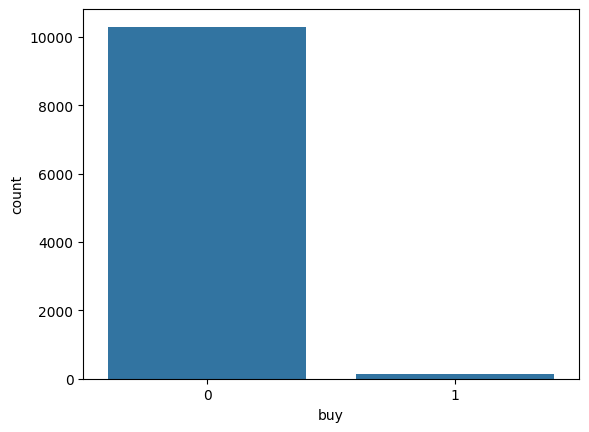

In [702]:
sns.countplot(df_traffic_train, x='buy')

Recortamos al 50% la clase mayoritaria

In [703]:
#Función que recorta la clase mayoritaria asumiendo que es 0
def class_cutter(dataset: pd.DataFrame, cut_percent: float) -> pd.DataFrame:
  dataframe = dataset.copy()
  #Genero el dataframe de la clase minoritaria
  criterio_minor = dataframe['buy'] == 1
  dataframe_minor = dataframe[criterio_minor]
  
  #Genero el dataframe de la clase mayoritaria
  criterio_mayor = dataframe['buy'] == 0
  dataframe_mayor = dataframe[criterio_mayor]

  #Separo el datafram de la clase mayoritaria en x e y para realizar el recorte
  x_mayor = dataframe_mayor.drop('buy', axis=1)
  y_mayor = dataframe_mayor['buy']

  #Defino el % de recorte
  get_percent = 1 - cut_percent

  #Utilizando train_test_split genero un recorte de manera aleatoria de la clase mayoritaria
  x_train, x_test_mayor, y_train, y_test_mayor = train_test_split(x_mayor, y_mayor, test_size=get_percent, random_state=123) #Utilizo la semilla para que en cada ejecución no haya variación del resultado
  #Vuelvo a unir x_n recortado e y_n recortado
  splited_dataframe_mayor = pd.concat([y_test_mayor, x_test_mayor], axis=1)

  #Retorno el dataframe de la clase minoritaria concatenada con el dataframe de la clase mayoritaria recortada
  return pd.concat([dataframe_minor, splited_dataframe_mayor])

<Axes: xlabel='buy', ylabel='count'>

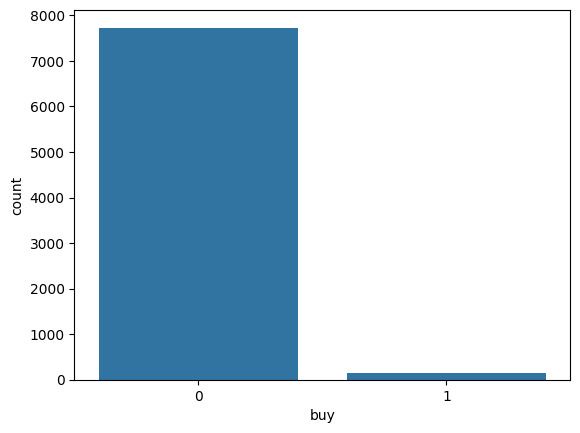

In [704]:
splitted_dataset = class_cutter(df_traffic_train, 0.25)
sns.countplot(splitted_dataset, x='buy')

## SMOTE

<Axes: xlabel='buy', ylabel='count'>

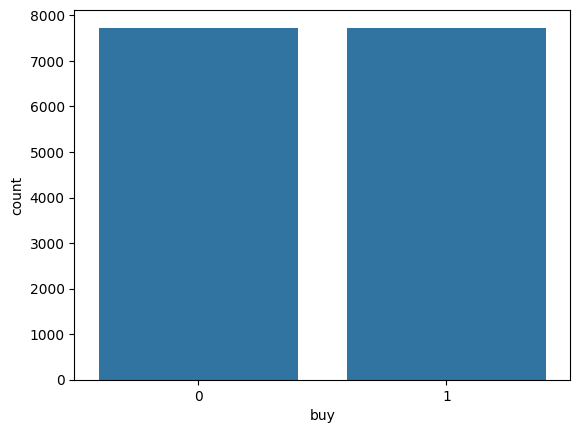

In [705]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=123)
x = splitted_dataset.drop('buy', axis=1)
y = splitted_dataset['buy']
smt_x, smt_y = smt.fit_resample(x, y)

#Graficamos para evaluar el resultado
final_dataset_train = pd.concat([smt_x,smt_y], axis=1)
sns.countplot(x='buy', data=final_dataset_train)

Revisamos que los valores correspondan a lo deseado. <br>
Si buy = 1 entonces transactionRevenue != 0 <br>
Si buy = 0 entonces transactionRevenue = 0

In [706]:
criteria = final_dataset_train['buy'] == 0
final_dataset_train[criteria]['transactionRevenue'].value_counts()

transactionRevenue
0.0            7714
67120000.0        1
6990000.0         1
14480000.0        1
69990000.0        1
15990000.0        1
702900000.0       1
306720000.0       1
145450000.0       1
3490000.0         1
15190000.0        1
9990000.0         1
239600000.0       1
79160000.0        1
Name: count, dtype: int64

In [707]:
final_dataset_train[(final_dataset_train['buy'] == 1) & (final_dataset_train['transactionRevenue'] == 0.0)]

,visitNumber,browser,operatingSystem,isMobile,deviceCategory,country,visits,hits,pageviews,bounces,...,medium,isTrueDirect,year,month,day,quarterMonth,weekday,time_range,transactionRevenue,buy
0,3,18,11,True,1,138,1,83,54,0,...,0,True,2017,5,1,2,0,3,0.0,1
28,3,5,6,False,0,138,1,77,51,0,...,6,True,2017,6,21,2,2,4,0.0,1
29,9,5,9,False,0,138,1,34,23,0,...,0,True,2016,11,23,4,2,4,0.0,1
51,4,5,3,False,0,138,1,38,27,0,...,6,True,2016,11,17,4,3,3,0.0,1
58,1,5,6,False,0,138,1,21,21,0,...,5,False,2017,5,9,2,1,3,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15437,1,5,9,False,0,138,1,23,21,0,...,3,True,2017,3,17,1,1,2,0.0,1
15438,3,11,8,True,0,138,1,79,52,0,...,3,True,2017,5,11,2,1,3,0.0,1
15440,1,5,7,False,0,138,1,20,20,0,...,0,True,2016,7,16,2,1,2,0.0,1
15448,6,5,7,False,0,138,1,37,28,0,...,1,True,2016,11,25,4,1,3,0.0,1


In [708]:
final_dataset_train.shape

(15454, 23)

In [709]:
df_traffic_train.shape

(10440, 23)

Conclusión: el dataset modificado de train con oversamplin tiene la mitad de registros menos que el dataset de train sin oversamplin. <br>
Si no se obtienen mejores resultados podríamos corregir con: <br>
a) Disminuyendo a 0.15 el % de test (y ver la diferencia de registros) <br>
b) Recortando solo un 25% de la clase mayoritaria (y ver la diferencia de registros) <br>

In [710]:
df_traffic_train.columns

Index(['visitNumber', 'browser', 'operatingSystem', 'isMobile',
       'deviceCategory', 'country', 'visits', 'hits', 'pageviews', 'bounces',
       'newVisits', 'campaign', 'source', 'medium', 'isTrueDirect', 'year',
       'month', 'day', 'quarterMonth', 'weekday', 'time_range', 'buy',
       'transactionRevenue'],
      dtype='object')

In [711]:
final_dataset_train.columns

Index(['visitNumber', 'browser', 'operatingSystem', 'isMobile',
       'deviceCategory', 'country', 'visits', 'hits', 'pageviews', 'bounces',
       'newVisits', 'campaign', 'source', 'medium', 'isTrueDirect', 'year',
       'month', 'day', 'quarterMonth', 'weekday', 'time_range',
       'transactionRevenue', 'buy'],
      dtype='object')

In [712]:
final_dataset_train = final_dataset_train[['visitNumber', 'browser', 'operatingSystem', 'isMobile',
       'deviceCategory', 'country', 'visits', 'hits', 'pageviews', 'bounces',
       'newVisits', 'campaign', 'source', 'medium', 'isTrueDirect',
       'year', 'month', 'day', 'quarterMonth', 'weekday', 'time_range', 'buy',
       'transactionRevenue']]

In [713]:
# df_traffic_test = df_traffic_test[['visitNumber', 'browser', 'operatingSystem', 'isMobile',
#        'deviceCategory', 'country', 'visits', 'hits', 'pageviews', 'bounces',
#        'newVisits', 'campaign', 'source', 'medium', 'isTrueDirect',
#        'year', 'month', 'day', 'quarterMonth', 'weekday', 'time_range',
#        'transactionRevenue']]

In [714]:
# df_traffic_train = df_traffic_train[['visitNumber', 'browser', 'operatingSystem', 'isMobile',
#        'deviceCategory', 'country', 'visits', 'hits', 'pageviews', 'bounces',
#        'newVisits', 'campaign', 'source', 'medium', 'isTrueDirect',
#        'year', 'month', 'day', 'quarterMonth', 'weekday', 'time_range',
#        'transactionRevenue']]

In [715]:
final_dataset_train.to_csv('database/traffic_site_train.csv', sep=';', index=False)
# df_traffic_train.to_csv('database/traffic_site_train.csv', sep=';', index=False)
df_traffic_test.to_csv('database/traffic_site_test.csv', sep=';', index=False)